In [1]:
#!pip install torchvision

## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Iinteractively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know check my tutorial. Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
- Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners 
- The most important parts of this tutorial from matrices to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy. 
<br>
<br>**Content:**
1. [Basics of Pytorch](#1)
    - Matrices
    - Math
    - Variable
1. [Linear Regression](#2)
1. [Logistic Regression](#3)
1. [Artificial Neural Network (ANN)](#4)
1. [Concolutional Neural Network (CNN)](#5)
1. Recurrent Neural Network (RNN)
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
    - 

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv']


<a id="1"></a> <br>
## Basics of Pytorch
### Matrices
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3x3 tensor.
- Lets look at array example with numpy that we already know.
    - We create numpy array with np.numpy() method
    - Type(): type of the array. In this example it is numpy
    - np.shape(): shape of the array. Row x Column

In [2]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [3]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x0000020A25842868>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [4]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.39654793 0.71644943 0.73158632]
 [0.25000183 0.00745068 0.79820933]]

tensor([[0.8615, 0.4544, 0.6702],
        [0.6370, 0.0631, 0.5161]])


- Even if when I use pytorch for neural networks, I feel better if I use numpy. Therefore, usually convert result of neural network that is tensor to numpy array to visualize or examine.
- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy(): from numpy to tensor
    - numpy(): from tensor to numpy

In [6]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[9.81453296e-05 8.20632227e-01]
 [3.75797032e-01 1.46828978e-02]]

tensor([[9.8145e-05, 8.2063e-01],
        [3.7580e-01, 1.4683e-02]], dtype=torch.float64)

<class 'numpy.ndarray'> [[9.81453296e-05 8.20632227e-01]
 [3.75797032e-01 1.46828978e-02]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b 
- Element wise division: torch.div(a,b) = a / b 
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [7]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables
- It accumulates gradients. 
- We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation. 
- Deep learning tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- Difference between variables and tensor is variable accumulates gradients.
- We can make math operations with variables, too.
- In order to make backward propagation we need variables

In [8]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [9]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


In [31]:
# Import Libraries
import torch
import torch.nn as nn
# import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
# Prepare Dataset
# load data
train = pd.read_csv(r"./data/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [34]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create ANN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [35]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data.item(), accuracy))

Iteration: 500  Loss: 0.1161302924156189  Accuracy: 96.45237731933594 %
Iteration: 1000  Loss: 0.04247375950217247  Accuracy: 97.6547622680664 %
Iteration: 1500  Loss: 0.034321509301662445  Accuracy: 97.98809814453125 %
Iteration: 2000  Loss: 0.0164484940469265  Accuracy: 98.16666412353516 %


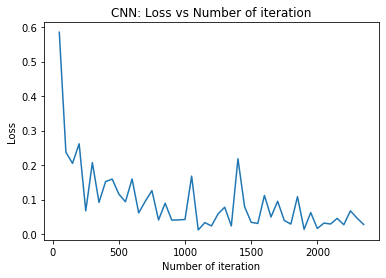

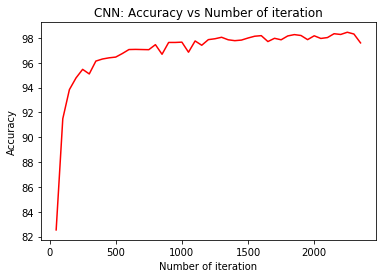

In [36]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### Conclusion
In this tutorial, we learn: 
1. Basics of pytorch
1. Linear regression with pytorch
1. Logistic regression with pytorch
1. Artificial neural network with with pytorch
1. Convolutional neural network with pytorch
1. Recurrent neural network with pytorch
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch

<br> **If you have any question or suggest, I will be happy to hear it **